In [48]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import StratifiedKFold
import pylab as pl
from matplotlib import collections  as mc
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [49]:
df_data_1 = pd.read_csv("../common/albertom/train_test_split/X_train_pca.csv", index_col="Unnamed: 0")
df_data_1 = df_data_1
print(df_data_1.shape)
df_data_1.head()

(22851, 15)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,29.479667,5.668109,-0.209441,-1.345416,-2.547592,-0.433499,-0.295371,-1.271754,-1.085988,-1.853838,-0.164936,0.076310,-0.171494,-0.263780,0.252866
1,-8.119109,-0.918377,3.104810,-0.575573,-2.197244,-0.918233,-3.359054,1.598714,-1.490960,0.341960,1.479482,0.113068,-0.044529,-1.130631,0.348799
2,-12.897545,8.760454,2.352287,-0.329169,0.227234,-0.455962,-3.328908,0.392441,2.903130,-1.738854,0.510227,-1.106186,0.176982,0.568320,-1.206535
3,3.210958,-1.071009,1.016989,-0.326063,-0.583567,-0.108464,-0.159468,-0.904758,1.466309,0.394476,0.082506,-0.034436,-0.178566,-1.071025,-0.518600
4,21.015684,-0.687015,-0.105652,-1.678955,2.238427,-2.418710,-3.161304,-0.056711,1.178904,2.322390,2.085181,2.039296,-1.051172,0.075783,-0.014417


In [50]:
df_target_data_1 = pd.read_csv("../common/albertom/train_test_split/y_train.csv", index_col="Unnamed: 0")
df_target_data_1 = df_target_data_1
print(df_target_data_1.shape)
df_target_data_1.head()

(22851, 2)


,0,1
0,0,34188358
1,0,41229741
2,0,43708758
3,0,43058589
4,1,25456031


In [51]:
df_data_2 = pd.read_csv("../common/albertom/train_test_split/X_test_pca.csv", index_col="Unnamed: 0")
df_data_2 = df_data_2
print(df_data_2.shape)
df_data_2.head()

(4033, 15)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.718190,-6.316477,-2.083559,0.975329,-0.296123,1.974713,0.379124,-0.007346,1.958610,-1.165546,0.759263,-0.382959,-0.584112,1.553049,0.568266
1,0.020365,-0.602705,9.139554,0.840974,0.546386,-5.230693,-0.084946,-10.231455,-0.852961,0.451181,0.669960,-0.829125,1.024185,0.229763,0.039209
2,9.975737,-3.348945,-0.572407,0.087099,0.788437,0.297061,0.889188,0.581228,-0.122152,-0.471265,0.488114,-0.081485,-0.171996,-0.577770,-0.305709
3,-22.105474,0.258111,0.720882,-3.436382,-1.524025,0.087214,-0.444141,0.608868,1.049485,0.409754,-0.329480,-0.048176,-0.009099,-0.527233,1.436252
4,-14.011642,2.771666,-3.670775,-0.453639,-0.303950,-1.095188,-2.580395,-1.656323,-1.115220,0.806742,-0.176123,0.275889,-0.784060,1.083732,-1.022600


In [52]:
df_target_data_2 = pd.read_csv("../common/albertom/train_test_split/y_test.csv", index_col="Unnamed: 0")
df_target_data_2 = df_target_data_2
print(df_target_data_2.shape)
df_target_data_2.head()

(4033, 2)


,0,1
0,1,10930294
1,1,55016784
2,0,48129536
3,1,37805023
4,0,22798417


In [53]:
# Given a set of model parameters (learning rate, regularization penalty coefficient), find the optimal parameters with cross validation

def cross_validation(set_of_learning_rates, set_of_regs, X_t, y_t):
    n_folds = 3
    skf = StratifiedKFold(y_t, n_folds=n_folds) # Get train-validation set stratified (keeps the same distribution) splitter
    set_of_params = [(x,y) for x in set_of_learning_rates for y in set_of_regs]
    
    print("Number of folds: " + str(n_folds))
    print("Number of parameters combinations: " + str(len(set_of_params)))

    f1 = np.zeros(len(set_of_params))

    # Repeat for every train-validate combination 
    for cv_train_index, cv_val_index in skf:
        X_cv_train, X_cv_val = X_t[cv_train_index], X_t[cv_val_index]
        y_cv_train, y_cv_val = y_t[cv_train_index], y_t[cv_val_index]

        for param_idx, param in enumerate(set_of_params):
            print("Combination " + str(param_idx) + ": Parameters: " +  str(param))
            print("Combination " + str(param_idx) + ": Train model" )
            W, b, W2, b2 = train_nn(X_cv_train, y_cv_train, param[0], param[1]) # Train
            print("Combination " + str(param_idx) + ": Predict") 
            _, f1_cv= predict(X_cv_val, y_cv_val, W, b, W2, b2) # Predict for valiation set
            f1[param_idx] = f1[param_idx] + f1_cv # Calculate error (cross entropy)

    f1 = f1 / n_folds # Calculate average error
    

    print("BEST LEARNING RATE (F1) = ", set_of_params[np.argmax(f1)][1])
    print("BEST REG (F1) = ", set_of_params[np.argmax(f1)][0])
    
    # Plot the results
    #fig = plt.figure()
    #ax = fig.add_subplot(111, projection='3d')
    #Y = map(lambda x: x[0], set_of_params)
    #X = map(lambda x: x[1], set_of_params)
    #for i in np.arange(len(accuracy)):
    #    ax.scatter(X[i], Y[i], accuracy[i], color = "r")
    #    ax.plot_surface(X[i], Y[i], accuracy[i], color = "b")
    #ax.set_xlabel('alpha')
    #ax.set_ylabel('L1')
    #ax.set_zlabel('R2')
    #plt.show()
    
    return set_of_params[np.argmax(f1)]

In [54]:
# Classify the X input set using 2-layer network with weight and bias parameters for each layer as parameters (W,b and W2, b2)

def predict(X, y, W, b, W2, b2):
    hidden_layer = np.maximum(0, np.dot(X, W) + b)
    scores = np.dot(hidden_layer, W2) + b2
    predicted_class = np.argmax(scores, axis=1)
    print(' > Prediction F1: %.2f' % f1_score(y, predicted_class))
    return predicted_class, f1_score(y, predicted_class)

In [55]:
# Train the 2-layer network (X_i input features, y_i input labels)

def train_nn(X_i, y_i, learning_rate, reg):
    
    # Parameter initilization
    W = 0.01 * np.random.randn(D,h)
    b = np.zeros((1,h))
    W2 = 0.01 * np.random.randn(h,K)
    b2 = np.zeros((1,K))
    num_examples = X_i.shape[0]
    
    # Epochs
    for i in np.arange(50000):

        hidden_layer = np.maximum(0, np.dot(X_i, W) + b)
        scores = np.dot(hidden_layer, W2) + b2 # Logits

        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # Turn logits into probabilities

        corect_logprobs = -np.log(probs[range(num_examples),y_i])
        data_loss = np.sum(corect_logprobs)/num_examples
        reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2) # Apply regularization
        loss = data_loss + reg_loss # Calculate loss

        # Backpropagation
        dscores = probs
        dscores[range(num_examples),y_i] -= 1
        dscores /= num_examples

        
        dW2 = np.dot(hidden_layer.T, dscores)
        db2 = np.sum(dscores, axis=0, keepdims=True)

        dhidden = np.dot(dscores, W2.T)

        dhidden[hidden_layer <= 0] = 0

        dW = np.dot(X_i.T, dhidden)
        db = np.sum(dhidden, axis=0, keepdims=True)

        dW2 += reg * W2
        dW += reg * W

        # Update parameters
        W += - learning_rate * dW
        b += - learning_rate * db
        W2 += - learning_rate * dW2
        b2 += - learning_rate * db2

    print("iteration %d: loss %f" % (i, loss))
    return W, b, W2, b2

In [56]:
# Calculate the final score for the model using test set

def score_model(X_tr, Y_tr, X_ts, Y_ts, best_learning_rate, best_reg):
    print("BEST LEARNING RATE (F1) = " + str(best_learning_rate))
    print("BEST REG (F1) = " + str(best_reg))

    # Train the model with the best hyperparameters
    W, b, W2, b2 = train_nn(X_tr, Y_tr, best_learning_rate, best_reg) 
    
    # Predict test data
    predicted_class, f1_test = predict(X_ts, Y_ts, W, b, W2, b2)
    print("F1 = " +str(f1_test))
    print(predicted_class)
    print(Y_ts)
    
    # Plot the results
    plt.scatter(np.arange(0, len(Y_ts)), predicted_class, color='b')
    plt.scatter(np.arange(0, len(Y_ts)), Y_ts, color='r')

    lines = []
    ax = plt.axes()

    for i in range(predicted_class.shape[0]):
        lines.append([(i, predicted_class[i]), (i, Y_ts[i])])

    lc = mc.LineCollection(lines, colors="g", linewidths=1)

    ax.add_collection(lc)
    ax.autoscale()
    ax.margins(0.1)
    plt.grid(True)

    plt.show()

In [57]:
# Prepare the dataset & configurations for the network

X = df_data_1.values
D = X.shape[1]
num_examples = X.shape[0]
K = len(df_target_data_1["0"].unique())
y = df_target_data_1["0"].values

step_size = 1e-04
reg = 1e-03

h = 10 # size of hidden layer

In [58]:
# Print dimensionalities

print("Input data shape: ",X.shape)
print("Target data shape",y.shape)
print("Number of features: ",D)
print("Number of classes: ",K)
print("Number of examples: ",num_examples)
print("Number of hidden units: ",h)

('Input data shape: ', (22851, 15))
('Target data shape', (22851,))
('Number of features: ', 15)
('Number of classes: ', 2)
('Number of examples: ', 22851)
('Number of hidden units: ', 10)


In [59]:
# Split the train and test datasets

X_train = X
X_test = df_data_2.values
y_train = y
y_test = df_target_data_2["0"].values

In [62]:
# Evaluate the different parameters for the model & plot

# set_of_learning_rates = np.arange(0.003, 0.013, step=0.001)
# set_of_regs = np.arange(0.013, 0.023, step=0.001)

set_of_learning_rates = np.arange(0.01, 0.03, step=0.01)
set_of_regs = np.arange(0.01, 0.03, step=0.01)

best_params = cross_validation(set_of_learning_rates, set_of_regs, X_train, y_train)

best_learning_rate = best_params[1]
best_reg = best_params[0]

Number of folds: 3
Number of parameters combinations: 4
Combination 0: Parameters: (0.01, 0.01)
Combination 0: Train model
iteration 49999: loss 0.457966
Combination 0: Predict
 > Prediction F1: 0.36
Combination 1: Parameters: (0.01, 0.02)
Combination 1: Train model
iteration 49999: loss 0.461448
Combination 1: Predict
 > Prediction F1: 0.33
Combination 2: Parameters: (0.02, 0.01)
Combination 2: Train model
iteration 49999: loss 0.453718
Combination 2: Predict
 > Prediction F1: 0.36
Combination 3: Parameters: (0.02, 0.02)
Combination 3: Train model
iteration 49999: loss 0.463086
Combination 3: Predict
 > Prediction F1: 0.33
Combination 0: Parameters: (0.01, 0.01)
Combination 0: Train model
iteration 49999: loss 0.457019
Combination 0: Predict
 > Prediction F1: 0.36
Combination 1: Parameters: (0.01, 0.02)
Combination 1: Train model
iteration 49999: loss 0.466641
Combination 1: Predict
 > Prediction F1: 0.34
Combination 2: Parameters: (0.02, 0.01)
Combination 2: Train model
iteration 499

BEST LEARNING RATE (F1) = 0.01
BEST REG (F1) = 0.02
iteration 49999: loss 0.465509
 > Prediction F1: 0.30
F1 = 0.304054054054
[1 0 0 ..., 0 0 0]
[1 1 0 ..., 1 0 0]


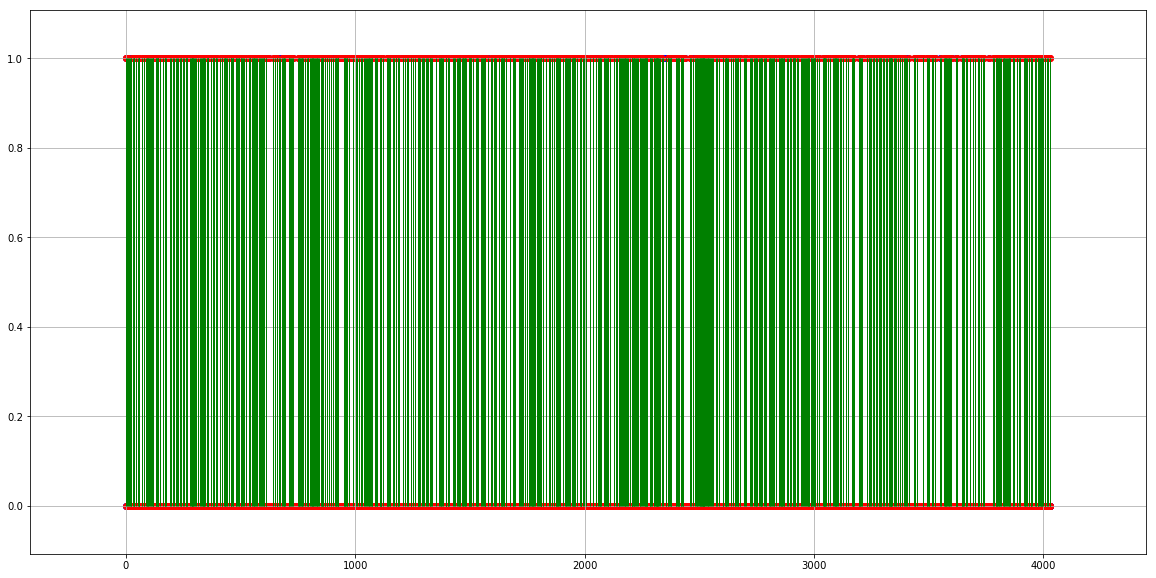

TypeError: 'NoneType' object is not iterable

In [64]:
# Calculate the final score for the model

predicted_class, f1 = score_model(X_train, y_train, X_test, y_test, best_learning_rate, best_reg)